Initialize. Call the commandoes:

In [1]:
# Initialization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import math
from math import exp, expm1
from dataclasses import dataclass

In [2]:
class BatchComponent:
    def __init__(self, Name, Flow, Concentration):
        self.Name = Name
        self.Flow = Flow
        self.Concentration = Concentration

componentA = BatchComponent("Component A", 100, 2)
#componentB = BatchComponent("Component B", 90, 3) 

class BatchReaction:
    def __init__(self, Reaction, Conversion, Rate):
        self.Reaction = Reaction
        self.Conversion = Conversion
        self.Rate = Rate
        
Reaction = BatchReaction("Reaction 1", 0.9, 1.5)

In [3]:
# The reaction is: A -> B + A_out

In [4]:
# Constants definitions
#The time for the inflow is now defined. This specifies for how long the streams will go into the mixer.
#The unit is in hours. For this example the simulation will run for 10 h
T_inflow = 10

In [5]:
# Variable definition
#The time is now made as an interval going from 1 to the T_inflow value 
time = np.arange(1,T_inflow)

In [6]:
# Volume calculations 
# The volume going into the batch reactor is V = sum(flow)*t 
V_in = componentA.Flow*time

#The constant volume after loading time is
V_reactor = componentA.Flow*T_inflow

In [7]:
#The concentrations of A and B are now calculated after the reaction

A_concentration = componentA.Concentration*(1-Reaction.Conversion)

B_concentration = componentA.Concentration*Reaction.Conversion

# The values of the concentrations are:
print('The concentration of A is ' + repr(A_concentration) + ', and B is ' + repr(B_concentration))

The concentration of A is 0.19999999999999996, and B is 1.8


In [8]:
#The mixing time for the reaction is now calculated for a first order reaction 
def integrand(X):
    return componentA.Concentration/(Reaction.Rate*(1-X)*componentA.Concentration)
t_react, err = quad(integrand, 0, Reaction.Conversion)
print(t_react)

1.535056728662702


In [9]:
# Reaction time as an array
t_reaction = np.arange(0.001, t_react, 0.01)

In [10]:
#For en reaktion af første orden aftager koncentrationen af reaktanten A eksponentielt med tiden 
C_A_decrease = componentA.Concentration*np.exp(-Reaction.Rate*t_reaction)


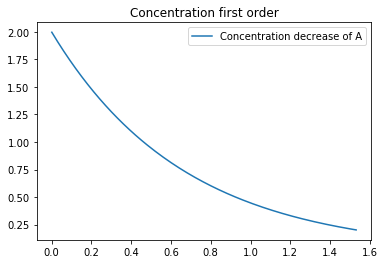

In [11]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(t_reaction,C_A_decrease, label = 'Concentration decrease of A')
plt.title('Concentration first order')
ax.legend()
plt.show()